# M103 TD19 2020-04-06

- Auteur: Samuel Lelièvre
- Licence: CC BY 4.0
- Date: 2020-04-06

S'il y a des questions sur la fin de l'exo 4.5, posez-les sinon on passe au 4.6.

Des corrigés sont en ligne 

- sur la page du cours sur eCampus:
  https://ecampus.paris-saclay.fr/course/view.php?id=17002#section-5
- sur les pages de certains enseignants:
  - Valentin Hernandez
    http://valentinhernandez.perso.math.cnrs.fr/
  - Joël Cohen
    https://joelcohen.github.io

# Exercice 4.6

In [19]:
S = lambda a, b: matrix([[a, -b], [b, a]])
T = lambda c, d: matrix([[c, d], [d, -c]])

In [6]:
a, b, c, d, aa, bb, cc, dd = SR.var('a b c d aa bb cc dd', domain='real')

In [7]:
S(a, b), S(aa, bb), S(a, b) + S(aa, bb), S(a, b) * S(aa, bb)

(
[ a -b]  [ aa -bb]  [ a + aa -b - bb]  [ a*aa - b*bb -aa*b - a*bb]
[ b  a], [ bb  aa], [ b + bb  a + aa], [ aa*b + a*bb  a*aa - b*bb]
)

In [8]:
z = a + i*b
zz = aa + i*bb
somme = z + zz
produit = z * zz
z, zz, somme.real() + i * somme.imag(), produit.real() + i * produit.imag()

(a + I*b, aa + I*bb, a + aa + I*b + I*bb, a*aa + I*aa*b + I*a*bb - b*bb)

In [9]:
Phi = lambda z: S(z.real(), z.imag())

In [16]:
z, Phi(z), S(a, b)

(
         [ a -b]  [ a -b]
a + I*b, [ b  a], [ b  a]
)

In [13]:
Phi(z) * Phi(zz), Phi(z * zz), Phi(z) * Phi(zz) == Phi(z * zz)

(
[ a*aa - b*bb -aa*b - a*bb]  [ a*aa - b*bb -aa*b - a*bb]      
[ aa*b + a*bb  a*aa - b*bb], [ aa*b + a*bb  a*aa - b*bb], True
)

In [14]:
Phi(z) * Phi(zz), Phi(z * zz), Phi(z) * Phi(zz) == Phi(z * zz)

(
[ a*aa - b*bb -aa*b - a*bb]  [ a*aa - b*bb -aa*b - a*bb]      
[ aa*b + a*bb  a*aa - b*bb], [ aa*b + a*bb  a*aa - b*bb], True
)

Passer de $S(a, b)$ à $S(a, -b)$ revient, du côté nombres complexes, à passer de $a + i b$ à $a - i*b$.

C'est la conjugaison complexe.

### Exo 4.6, question 3.a

In [21]:
R = S(0, 1)
Sigma = T(1, 0)
Sigmaprime = T(0, 1)

In [23]:
x, y = SR.var('x y')
M = matrix(2, 1, [x, y])

In [25]:
sigma = lambda M: Sigma * M

In [26]:
sigma(M)

[ x]
[-y]

L'application $\sigma$ envoie le point de coordonnées $(x, y)$ sur le point de coordonnées $(x, -y)$.

C'est donc une réflexion selon l'axe des abscisses.

#### Exo 4.6, question 3.b

In [27]:
sigmaprime = lambda M: Sigmaprime * M

In [28]:
sigmaprime(M)

[y]
[x]

La transformation $\sigma'$ échange les coordonnées $x$ et $y$.

Les points situés sur la droite d'équation $x = y$ donc ils sont fixés.

La transformation $\sigma'$ est une réflexion orthogonale selon l'axe
d'équation $y = x$.

In [35]:
D = plot(lambda x: x, (-3, 3), color='purple')
P = point2d([(1, 2)], color='blue')
PP = point2d([(2, 1)], color = 'red')

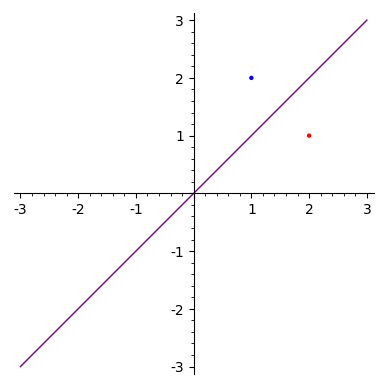

In [36]:
(D + P + PP).show(aspect_ratio=1)

#### Exo 4.6, question 3.c

In [33]:
r = lambda M: R * M

In [34]:
r(M)

[-y]
[ x]

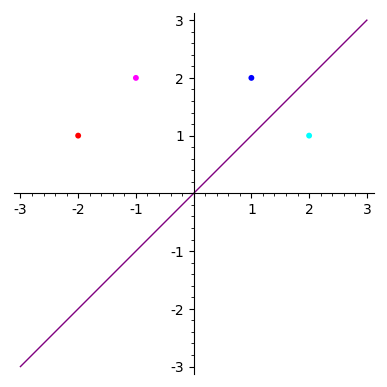

In [44]:
P = point2d([(1, 2)], color='blue', size=18)
PP = point2d([(2, 1)], color='cyan', size=18)
RP = point2d([(-2, 1)], color = 'red', size=18)
RPP = point2d([(-1, 2)], color = 'magenta', size=18)
(D + P + PP + RP + RPP).show(aspect_ratio=1)

La transformation $r$ est une rotation de centre l'origine et d'angle un quart de tour.

On aimerait montrer que $r = \sigma' \circ \sigma$.

C'est-à-dire que pour tout $M$, on a $r(M) = (\sigma' \circ \sigma)(M) = \sigma'(\sigma(M))$.

Cela revient à montrer que pour tout vecteur $X$ de $\mathbb{R}^2$, on a $R \cdot X = \Sigma' \cdot \Sigma \cdot X$.

Cela revient à montrer que le produit de matrices $\Sigma' \cdot \Sigma$ vaut $R$.

In [47]:
Sigmaprime * Sigma, R, Sigmaprime * Sigma == R

(
[ 0 -1]  [ 0 -1]      
[ 1  0], [ 1  0], True
)

## Exercice 4.7

In [48]:
I = identity_matrix(3)
I

[1 0 0]
[0 1 0]
[0 0 1]

In [49]:
[sum(ligne) for ligne in I]

[1, 1, 1]

In [50]:
[sum(colonne) for colonne in I.columns()]

[1, 1, 1]

In [52]:
def est_magique(M):
    somme = sum(M[0])
    return all(sum(ligne) == somme for ligne in M) and all(sum(col) == somme for col in M.columns())

In [53]:
est_magique(I)

True

On veut montrer que l'ensemble $E$ des matrices magiques est un sous-espace vectoriel de $\mathcal{M}_3(\mathbb{R})$.

In [57]:
M3R = MatrixSpace(QQ, 3)

In [61]:
matrice_nulle = M3R.zero()
matrice_nulle

[0 0 0]
[0 0 0]
[0 0 0]

In [62]:
est_magique(matrice_nulle)

True

Si $A$ est magique de somme $a$,
et si $B$ est magique de somme $b$, alors
- chaque ligne de $A + B$ est somme d'une ligne de $A$ et d'une ligne de $B$,
  - donc la somme de cette ligne est $a + b$
- chaque colonne de $A + B$ est somme d'une colonne de $A$ et d'une colonne de $B$,
  - donc la somme de cette colonne est $a + b$
Ainsi, $A + B$ est magique, de somme $a + b$.

Si $A$ est magique de somme $a$, et si $\lambda$ est un réel,
alors
- chaque ligne ou colonne de $\lambda \cdot A$ est $\lambda$ fois la ligne ou colonne correspondante de $A$, et a donc pour somme $\lambda \cdot a$.

Ainsi, $\lambda \cdot A$ est magique de somme $\lambda \cdot a$.

Bilan: l'ensemble $E$
- contient la matrice nulle
- est stable par somme
- est stable par mise à l'échelle

C'est donc un sous-espace vectoriel de $\mathcal{M}_3(\mathbb{R})$.

In [63]:
a1, a2, a3, b1, b2, b3, c1, c2, c3 = SR.var('a1, a2, a3, b1, b2, b3, c1, c2, c3')

In [64]:
d1, d2, d3, e1, e2, e3, f1, f2, f3 = SR.var('d1, d2, d3, e1, e2, e3, f1, f2, f3')

Supposons que $A$ est magique de somme $a$, et $B$ magique de somme $b$.

In [77]:
A = matrix(3, [a1, a2, a3, b1, b2, b3, c1, c2, c3]).T
B = matrix(3, [d1, d2, d3, e1, e2, e3, f1, f2, f3]).T

In [78]:
A, B

(
[a1 b1 c1]  [d1 e1 f1]
[a2 b2 c2]  [d2 e2 f2]
[a3 b3 c3], [d3 e3 f3]
)

In [79]:
A * B

[a1*d1 + b1*d2 + c1*d3 a1*e1 + b1*e2 + c1*e3 a1*f1 + b1*f2 + c1*f3]
[a2*d1 + b2*d2 + c2*d3 a2*e1 + b2*e2 + c2*e3 a2*f1 + b2*f2 + c2*f3]
[a3*d1 + b3*d2 + c3*d3 a3*e1 + b3*e2 + c3*e3 a3*f1 + b3*f2 + c3*f3]

In [80]:
[sum(ligne) for ligne in (A*B).rows()]

[a1*d1 + b1*d2 + c1*d3 + a1*e1 + b1*e2 + c1*e3 + a1*f1 + b1*f2 + c1*f3,
 a2*d1 + b2*d2 + c2*d3 + a2*e1 + b2*e2 + c2*e3 + a2*f1 + b2*f2 + c2*f3,
 a3*d1 + b3*d2 + c3*d3 + a3*e1 + b3*e2 + c3*e3 + a3*f1 + b3*f2 + c3*f3]

In [81]:
[sum(colonne) for colonne in (A*B).columns()]

[a1*d1 + a2*d1 + a3*d1 + b1*d2 + b2*d2 + b3*d2 + c1*d3 + c2*d3 + c3*d3,
 a1*e1 + a2*e1 + a3*e1 + b1*e2 + b2*e2 + b3*e2 + c1*e3 + c2*e3 + c3*e3,
 a1*f1 + a2*f1 + a3*f1 + b1*f2 + b2*f2 + b3*f2 + c1*f3 + c2*f3 + c3*f3]

Prenons par exemple la somme de la première ligne de $A\cdot B$, c'est:

`a1*d1 + a1*d2 + a1*d3 + a2*e1 + a2*e2 + a2*e3 + a3*f1 + a3*f2 + a3*f3`

Cela se réécrit:

`a1*(d1 + d2 + d3) + a2*(e1 + e2 + e3) + a3*(f1 + f2 + f3)`

c'est-à-dire `a1*b + a2*b + a3*b`

c'est-à-dire `(a1 + a2 + a3)*b`

c'est-à-dire `a * b`.

Pour toutes les lignes et colonnes de $A \cdot B$, la somme
des éléments se calcule de la même façon et vaut $a \cdot b$.

Donc la matrice produit $A \cdot B$ est magique, de somme $a \cdot b$.

#### Exo 4.7, question 3.a

Pour montrer que $F$ est un sous-espace vectoriel de $E$,
on montre que
- $F$ contient la matrice nulle
- $F$ est stables par somme et mise à l'échelle
  - ou si on préfère, par combinaisons linéaires
  - ou si on préfère, par combinaisons linéaires réduites $A + \lambda \cdot B$

La matrice nulle est dans $F$ puisque toutes ses lignes et toutes ses colonnes ont pour somme $0$.

D'après les calucls de la question 1, si $A$ et $B$ sont dans $F$,
alors en particulier elles sont dans $E$ avec $a = 0$ et $b = 0$.

Alors $A + \lambda \cdot B$ est encore dans $E$, avec pour somme
par ligne ou par colonne $a + \lambda \cdot b$, c'est-à-dire $0 + \lambda \cdot 0$, qui vaut $0$.

On conclut que $A + \lambda \cdot B$ est en fait dans $F$.

On a bien montré que $F$ est un sous-espace vectoriel de $E$.

On veut montrer que $D \oplus F = E$, c'est-à-dire montrer que
tout élément de $E$ est somme, d'une façon unique,
d'un élément de $F$ et d'un élément de $D$.

Soit $A$ une matrice de $E$, de somme $a$.

On aimerait trouver une matrice $S = \lambda \cdot I_3 \in D$
et une matrice $N \in F$, telles que $S + N = A$.

D'après ce qu'on a vu précédemment,

- la somme (par ligne ou par colonne) de $S$ vaut: $\lambda$
- la somme (par ligne ou par colonne) de $N$ vaut: $0$
- la somme (par ligne ou par colonne) de $S + N$ vaut: $\lambda + 0$

Pour avoir $S + N = A$ on doit donc avoir: $\lambda = a$.

On écrit donc $A = a \cdot I_3 + (A - a\cdot I_3)$

et on remarque que $S = a \cdot I_3$ et $N = A - a\cdot I_3$ sont comme on veut,
et que c'est la seule solution possible.

On a montré que toute matrice $A \in E$ est somme, de façon unique,
d'un multiple de la matrice identité et d'une matrice de somme nulle.

On a donc montré que $D \oplus F = E$.

#### Exo 4.7, question 3.b

Système d'équations cartésiennes pour $F$.

Ici les coordonnées s'appellent $a_1$, $a_2$, $a_3$, $b_1$, $b_2$, $b_3$, $c_1$, $c_2$, $c_3$.

La définition de $F$ est que la somme par ligne et la somme par colonne vaut $0$.

Cela se traduit par le système d'équations cartésiennes suivant:

- $a_1 + b_1 + c_1 = 0$
- $a_2 + b_2 + c_2 = 0$
- $a_3 + b_3 + c_3 = 0$
- $a_1 + a_2 + a_3 = 0$
- $b_1 + b_2 + b_3 = 0$
- $c_1 + c_2 + c_3 = 0$



Pour trouver une base de $F$ on échelonne ce système de 6 équations à 9 inconnues.

In [70]:
M = matrix([[1, 0, 0, 1, 0, 0, 1, 0, 0],
            [0, 1, 0, 0, 1, 0, 0, 1, 0],
            [0, 0, 1, 0, 0, 1, 0, 0, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 1, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 1, 1, 1],
           ])

In [71]:
M

[1 0 0 1 0 0 1 0 0]
[0 1 0 0 1 0 0 1 0]
[0 0 1 0 0 1 0 0 1]
[1 1 1 0 0 0 0 0 0]
[0 0 0 1 1 1 0 0 0]
[0 0 0 0 0 0 1 1 1]

In [72]:
M.echelon_form()

[ 1  0  0  0 -1 -1  0 -1 -1]
[ 0  1  0  0  1  0  0  1  0]
[ 0  0  1  0  0  1  0  0  1]
[ 0  0  0  1  1  1  0  0  0]
[ 0  0  0  0  0  0  1  1  1]
[ 0  0  0  0  0  0  0  0  0]

On voit qu'il y a
- 5 pivots, donc 5 inconnues principales: $a_1$, $a_2$, $a_3$, $b_1$, $c_1$
- 4 inconnues secondaires: $b_2$, $b_3$, $c_2$, $c_3$

La dimension de $F$ est $4$.

La forme échelonnée réduite est

In [74]:
M.rref()

[ 1  0  0  0 -1 -1  0 -1 -1]
[ 0  1  0  0  1  0  0  1  0]
[ 0  0  1  0  0  1  0  0  1]
[ 0  0  0  1  1  1  0  0  0]
[ 0  0  0  0  0  0  1  1  1]
[ 0  0  0  0  0  0  0  0  0]

In [82]:
A

[a1 b1 c1]
[a2 b2 c2]
[a3 b3 c3]

Une base de $F$ est obtenue en fixant tour à tour chaque inconnue secondaire à $1$ et les autres à $0$.

Si on fixe $b_2 = 1$ et les autres à $0$, on obtient:



In [84]:
print("Une base de F est:")
(
matrix([[ 1, -1,  0],
        [-1,  1,  0],
        [ 0,  0,  0],
       ]),
matrix([[ 1,  0, -1],
        [-1,  0,  1],
        [ 0,  0,  0],
       ]),
matrix([[ 1, -1,  0],
        [ 0,  0,  0],
        [-1,  1,  0],
       ]),
matrix([[ 1,  0, -1],
        [ 0,  0,  0],
        [-1,  0,  1],
       ]),
)

Une base de F est:


(
[ 1 -1  0]  [ 1  0 -1]  [ 1 -1  0]  [ 1  0 -1]
[-1  1  0]  [-1  0  1]  [ 0  0  0]  [ 0  0  0]
[ 0  0  0], [ 0  0  0], [-1  1  0], [-1  0  1]
)

Pour obtenir une base de $E$, on utilise que $D \oplus F = E